In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


#-------------------------------Original Code---------------------------------------------

## After training the network, whatever accuracy you get is your base accuracy. Epochs = 100

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


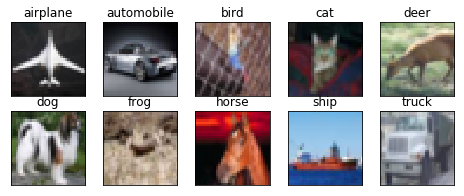

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()


Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 15s 37ms/step - loss: 1.8559 - acc: 0.2932 - val_loss: 1.4374 - val_acc: 0.4662
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3417 - acc: 0.5122 - val_loss: 1.1048 - val_acc: 0.6053
Epoch 3/100
390/390 [==============================] - 9s 22ms/step - loss: 1.1133 - acc: 0.6062 - val_loss: 0.9390 - val_acc: 0.6662
Epoch 4/100
390/390 [==============================] - 9s 22ms/step - loss: 0.9723 - acc: 0.6603 - val_loss: 0.8440 - val_acc: 0.7059
Epoch 5/100
390/390 [==============================] - 9s 22ms/step - loss: 0.8716 - acc: 0.6986 - val_loss: 0.7658 - val_acc: 0.7358
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7915 - acc: 0.7284 - val_loss: 0.7514 - val_acc: 0.7431
Epoch 7/100
390/390 [==============================] - 9s 22ms/step - loss: 0.7360 - acc: 0.7477 - val_loss: 0.6858 - val_acc: 0.7679
Epoch 8/100
390/390 [==============================] - 9s 23m

Model took 888.00 seconds to train


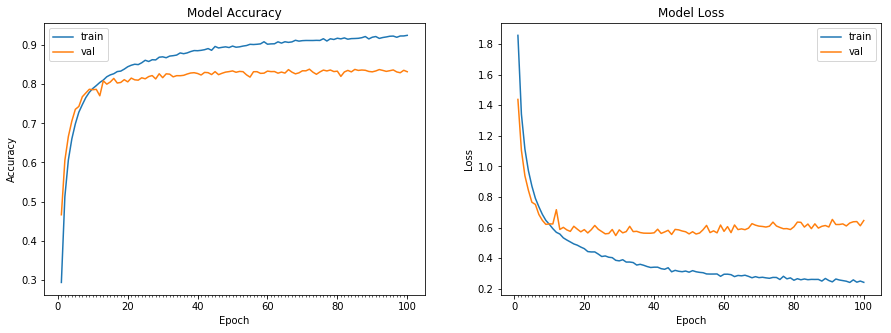

Accuracy on test data is: 83.19


In [0]:
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))



---


#-----------------------------------------MODIFIED---------------------------------------


---



###2. Fix the network above: 
1. remove dense 
2. add layers required to reach RF
3. fix kernel scaleup and down (1x1) 
4. see if all dropouts are properly placed
5. follow the guidelines we discussed in the class 
6. Get accuracy more than the base accuracy in less number 100 epochs. Hint, you might want to use "border_mode='same',"
7. Save File as Assignment 6A

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers


In [0]:
model = Sequential()

model.add(Convolution2D(24, 3, 3, border_mode='same', input_shape=(32, 32, 3))) ##Receptive_Field=3
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Convolution2D(24, 1, 1)) #Receptive_Field=3
model.add(Activation('relu'))


model.add(Convolution2D(48, 3, 3, border_mode='same')) #Receptive_Field=5
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Convolution2D(48, 1, 1)) #Receptive_Field=5
model.add(Activation('relu'))


model.add(MaxPooling2D(pool_size=(2, 2))) #Receptive_Field=10


model.add(Convolution2D(48, 3, 3, border_mode='same')) #Receptive_Field=12
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(48, 1, 1)) #Receptive_Field=12
model.add(Activation('relu'))



model.add(Convolution2D(96, 3, 3, border_mode='same')) #Receptive_Field=14
model.add(BatchNormalization())
model.add(Activation('relu'))



model.add(Convolution2D(96, 1, 1)) #Receptive_Field=14
model.add(Activation('relu'))



model.add(MaxPooling2D(pool_size=(2, 2))) #Receptive_Field=24



model.add(Convolution2D(96, 3, 3,  border_mode='same')) #Receptive_Field=26
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(96, 1, 1)) #Receptive_Field=26
model.add(Activation('relu'))


model.add(Convolution2D(192, 3, 3, border_mode='same')) #Receptive_Field=28
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(192, 1, 1)) #Receptive_Field=28
model.add(Activation('relu'))


model.add(Convolution2D(10, 8, 8)) #Receptive_Field=


model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0615 04:20:09.658528 140437288527744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
W0615 04:20:09.698745 140437288527744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 04:20:09.704700 140437288527744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0615 04:20:09.

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 24)        672       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 24)        96        
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 24)        600       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 24)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 48)        10416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 48)        192       
__________

In [0]:
from keras.callbacks import  ModelCheckpoint

filepath="/content/gdrive/My Drive/Colab Notebooks/EVA/6/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
#file path store weights in google drive

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# Store the weights when the validation accuracy increases

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.002 * 1/(1 + 0.119 * epoch), 10)


from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=.25, 
                             featurewise_center=True,
                             featurewise_std_normalization=True,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,                           
                             vertical_flip=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 callbacks=[checkpoint],#,LearningRateScheduler(scheduler, verbose=1)],
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
W0615 04:21:28.180274 140437288527744 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a futur

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


390/390 [==============================] - 30s 78ms/step - loss: 1.7876 - acc: 0.3416 - val_loss: 1.8597 - val_acc: 0.3555

Epoch 00001: val_acc improved from -inf to 0.35550, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/6/epochs:001-val_acc:0.355.hdf5
Epoch 2/100
390/390 [==============================] - 26s 66ms/step - loss: 1.4727 - acc: 0.4622 - val_loss: 1.9010 - val_acc: 0.3777

Epoch 00002: val_acc improved from 0.35550 to 0.37770, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/6/epochs:002-val_acc:0.378.hdf5
Epoch 3/100
390/390 [==============================] - 26s 68ms/step - loss: 1.3173 - acc: 0.5245 - val_loss: 1.2900 - val_acc: 0.5414

Epoch 00003: val_acc improved from 0.37770 to 0.54140, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/6/epochs:003-val_acc:0.541.hdf5
Epoch 4/100
390/390 [==============================] - 26s 67ms/step - loss: 1.2232 - acc: 0.5603 - val_loss: 1.3863 - val_acc: 0.5562

Epoch 00004: val_acc improv

Model took 2567.06 seconds to train


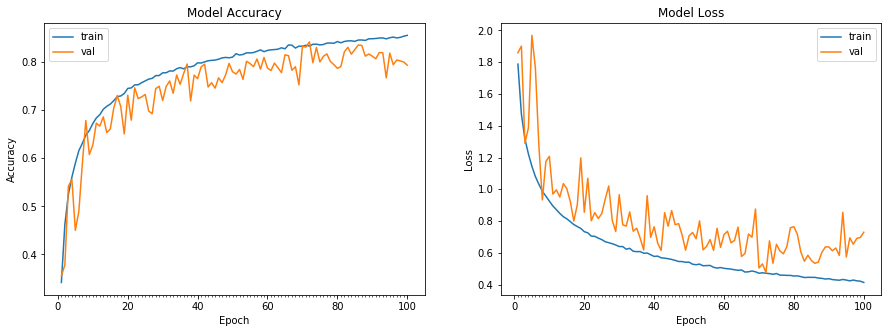

Accuracy on test data is: 79.37


In [0]:
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model.load_weights('/content/gdrive/My Drive/Colab Notebooks/EVA/6/epochs:072-val_acc:0.842.hdf5')

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

score = model.evaluate(test_features, test_labels)#, steps = 10,verbose=0)
print(score[1])

10000/10000 [==============================] - 2s 169us/step
[0.4756221973061562, 0.8422]


In [0]:
print(score[1])

0.8422
